## Table content:
* [Load Data](#LOAD-DATA)
* [Data Visualization](#DATA-VISUALIZATION)
* [CNN Model](#BUILD-A-SIMPLE-CNN-MODEL)
* [Train model](#TRAIN-MODEL-with-Different-Optimizer,-and-Hyperparameter.)
    * [Train Model with different optimizer](#Train-model-with-Different-Optimizer)
    * [Train Model with different learning rate](#Train-model-with-Different-Learning-Rate)
    * [Train Model with different batch size](#Train-model-with-Different-Batch-Size)
* [What inside the model?](#SLICE-MODEL.-What-inside-the-model?)
* [Eval model performance and explain result](#ASSESS-TRAINED-MODEL-PERFORMANCE)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
import tensorflow as tf
import keras
from keras.optimizers import *
from keras.layers import Dense, Dropout, Flatten, Conv2D,AveragePooling2D, BatchNormalization, Input


In [3]:
large_width = 100
np.set_printoptions(linewidth=large_width)

# LOAD DATA

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# DATA VISUALIZATION

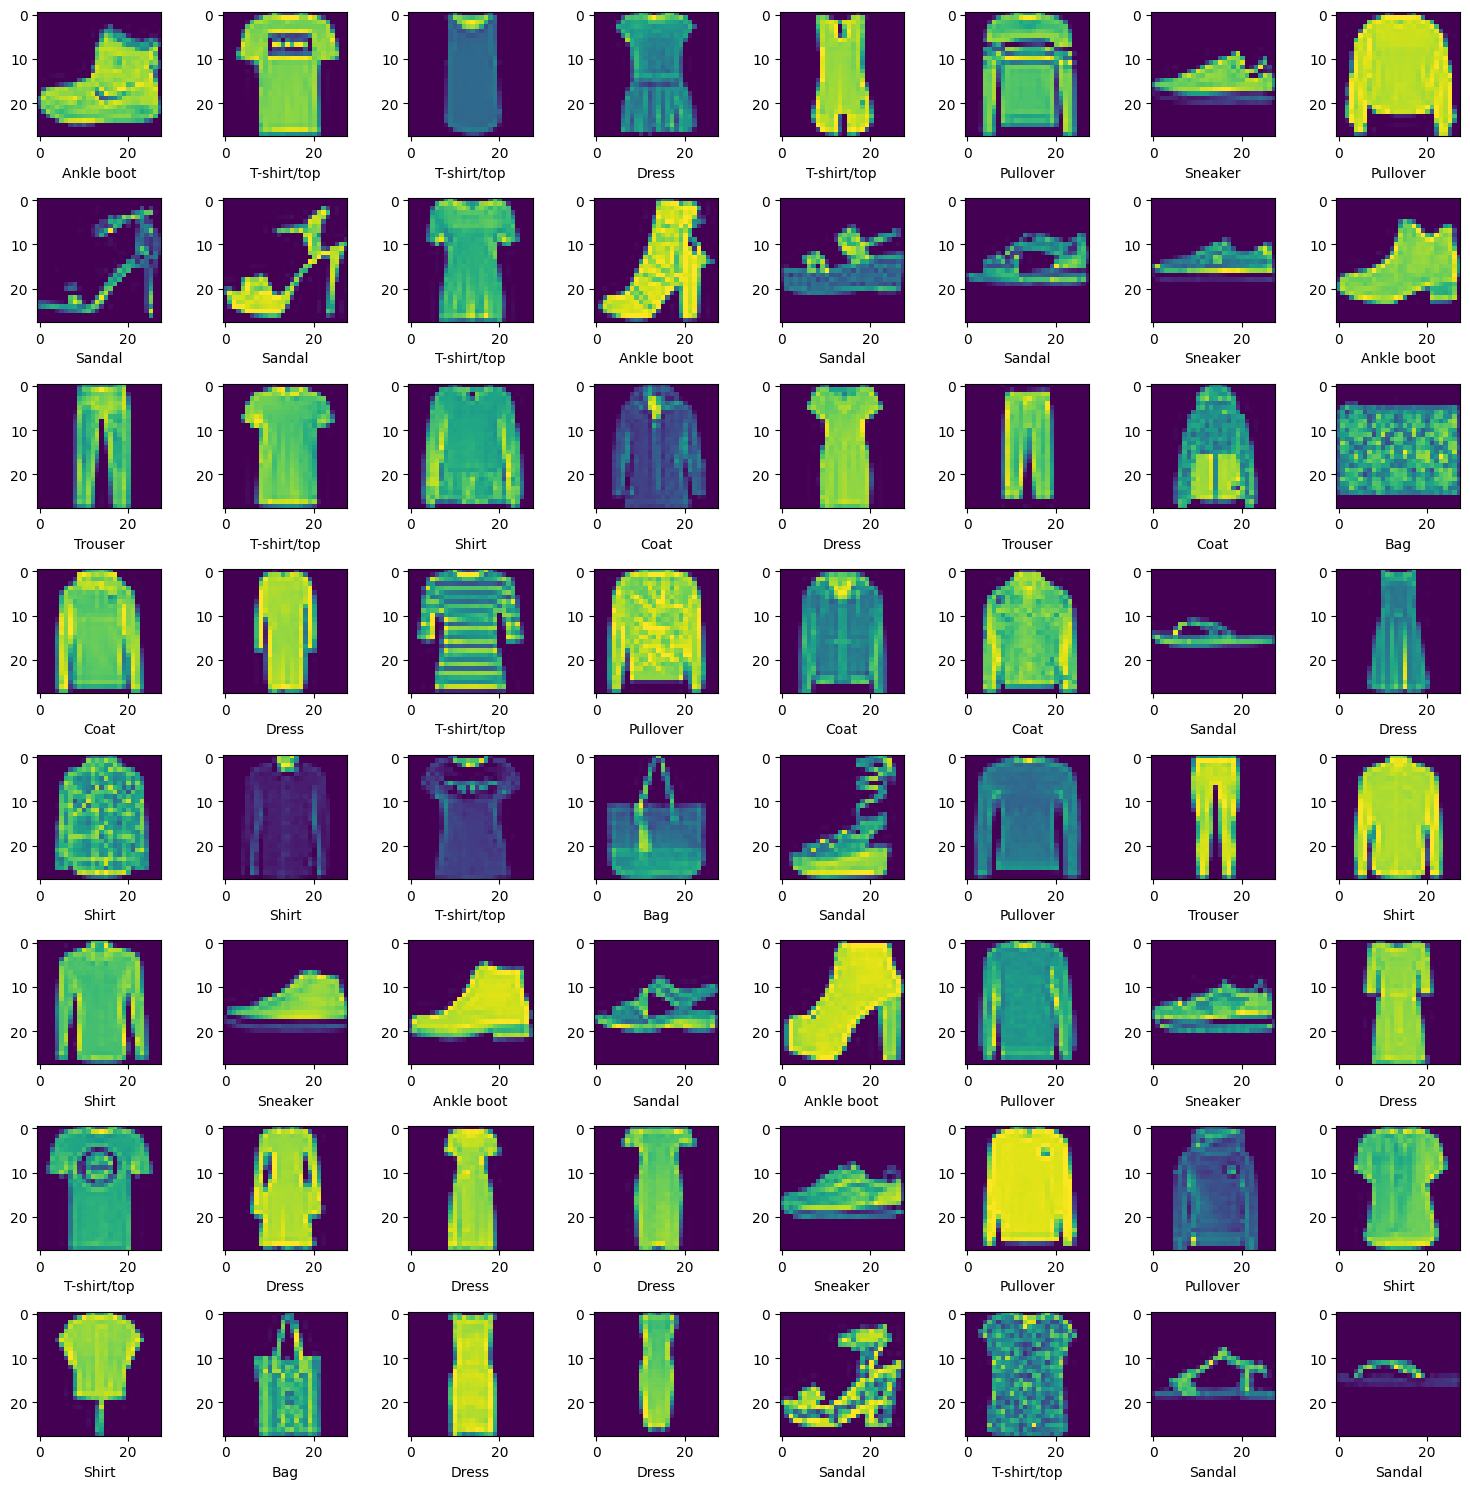

In [5]:
list_label = ["T-shirt/top",
              "Trouser",
              "Pullover",
              "Dress",
              "Coat",
              "Sandal",
              "Shirt",
              "Sneaker",
              "Bag",
              "Ankle boot"]

W_grid = 8
L_grid = 8

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel()

images = train_images[:L_grid * W_grid]

for i in range(L_grid * W_grid):
    axes[i].imshow(train_images[i])
    axes[i].set_xlabel(list_label[train_labels[i]])

plt.tight_layout()
plt.show()


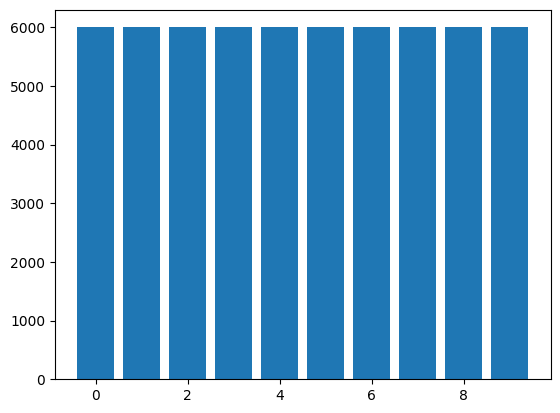

In [ ]:
a, b = np.unique(train_labels, return_counts=True)
plt.bar(a, b)
plt.show()

# BUILD A SIMPLE CNN MODEL

In [6]:
def build_model(activation = 'relu', optimizer=Adam, learning_rate=0.0001):
    keras.backend.clear_session()
    input = Input(shape = (28,28, 1))
    x1 = Conv2D(32, kernel_size = (3,3), padding = "same", activation = activation)(input)
    x1 = Conv2D(64, kernel_size = (3,3), padding = "same", activation = activation)(x1)
    x2 = Conv2D(256, kernel_size = (3,3), padding = "same", activation = activation)(x1)
    x2 = AveragePooling2D((2,2))(x2)

    x3 = Conv2D(64, kernel_size = (3,3), padding = "same", activation = activation)(x2)
    x3 = Conv2D(64, kernel_size = (3,3), padding = "same", activation = activation)(x3)
    x3 = Conv2D(64, kernel_size = (3,3), padding = "same", activation = activation)(x3)
    x3 = AveragePooling2D((2,2))(x3)
    x4 = Flatten()(x3)

    x5 = Dense(128,kernel_initializer='lecun_uniform', activation = activation)(x4)
    x5 = Dropout(0.2)(x5)
    x6 = Dense(32, kernel_initializer='lecun_uniform', activation = activation)(x5)
    #   x6 = BatchNormalization()(x6)
    x6 = Dense(10, activation= "softmax")(x6)

    model = tf.keras.Model(inputs=input, outputs=x6)

    model.compile(optimizer=optimizer(learning_rate=0.0001),
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )
    return model
model = build_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 256)       147712    
                                                                 
 average_pooling2d (Average  (None, 14, 14, 256)       0         
 Pooling2D)                                                      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        147520    
                                                             

# TRAIN MODEL with Different Optimizer, and Hyperparameter.

## Train model with Different Optimizer

In [7]:
optimizers = [Adam, SGD, RMSprop]

history_dict = {}

for optimizer in optimizers:
    print(f'Training with optimizer: {optimizer.__name__}')

    model = build_model(optimizer=optimizer)

    history = model.fit(x=train_images, y=train_labels,
                        validation_data=(test_images, test_labels),
                        batch_size=32, epochs=30, verbose=1)

    history_dict[optimizer.__name__] = history


Training with optimizer: Adam
Epoch 1/30
1875/1875 [==============================] - 28s 11ms/step - loss: 0.5334 - sparse_categorical_accuracy: 0.8078 - val_loss: 0.3635 - val_sparse_categorical_accuracy: 0.8662
Epoch 2/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3317 - sparse_categorical_accuracy: 0.8807 - val_loss: 0.3059 - val_sparse_categorical_accuracy: 0.8894
Epoch 3/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2741 - sparse_categorical_accuracy: 0.9006 - val_loss: 0.2667 - val_sparse_categorical_accuracy: 0.9022
Epoch 4/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2405 - sparse_categorical_accuracy: 0.9126 - val_loss: 0.2418 - val_sparse_categorical_accuracy: 0.9132
Epoch 5/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2099 - sparse_categorical_accuracy: 0.9237 - val_loss: 0.2222 - val_sparse_categorical_accuracy: 0.9180
Epoch 6/30
1875/1875 [============================

In [ ]:
import pickle

with open('history_dict.pkl', 'wb') as f:
    pickle.dump(history_dict, f)
!cp /content/history_dict.pkl /content/drive/MyDrive/history_dict.plk

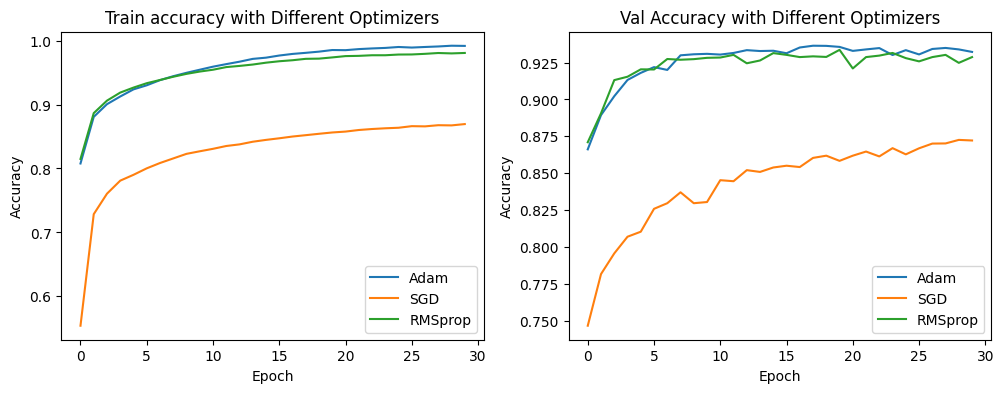

In [14]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
for optimizer, history in history_dict.items():
    plt.plot(history.history['sparse_categorical_accuracy'], label=optimizer)
plt.title('Train accuracy with Different Optimizers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
for optimizer, history in history_dict.items():
    plt.plot(history.history['val_sparse_categorical_accuracy'], label=optimizer)
plt.title('Val accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Val Accuracy with Different Optimizers')
plt.show()

### Note: Adam and RMSprop make model convergence faster SGD.

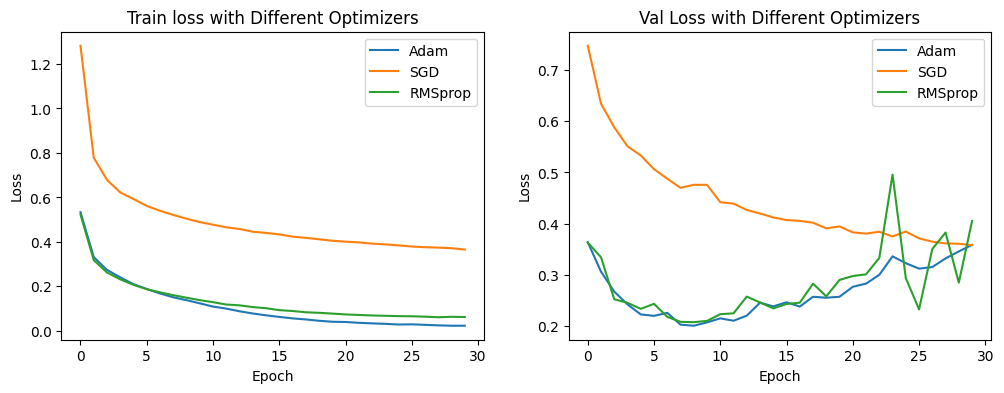

In [19]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
for optimizer, history in history_dict.items():
    plt.plot(history.history['loss'], label=optimizer)
plt.title('Train loss with Different Optimizers')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
for optimizer, history in history_dict.items():
    plt.plot(history.history['val_loss'], label=optimizer)
plt.title('Val loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Val Loss with Different Optimizers')
plt.show()

### Note: Adam and RMSprop make model converging faster, then after about 8 epoch model was overfit. SGD is continue converging.

## Train model with Different Learning Rate

In [8]:
lrs=[0.001, 0.0005, 0.0001]

history_lr_dict = {}

for lr in lrs:
    print(f'Training with learning rate: {lr}')

    model = build_model(learning_rate=lr)

    history = model.fit(x=train_images, y=train_labels,
                        validation_data=(test_images, test_labels),
                        batch_size=32, epochs=30, verbose=1)

    history_lr_dict[lr] = history

Training with learning rate: 0.001
Epoch 1/30
1875/1875 [==============================] - 22s 10ms/step - loss: 0.5576 - sparse_categorical_accuracy: 0.8076 - val_loss: 0.3641 - val_sparse_categorical_accuracy: 0.8691
Epoch 2/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3347 - sparse_categorical_accuracy: 0.8789 - val_loss: 0.2896 - val_sparse_categorical_accuracy: 0.8948
Epoch 3/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2733 - sparse_categorical_accuracy: 0.9004 - val_loss: 0.2557 - val_sparse_categorical_accuracy: 0.9056
Epoch 4/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2383 - sparse_categorical_accuracy: 0.9124 - val_loss: 0.2344 - val_sparse_categorical_accuracy: 0.9150
Epoch 5/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2113 - sparse_categorical_accuracy: 0.9234 - val_loss: 0.2254 - val_sparse_categorical_accuracy: 0.9204
Epoch 6/30
1875/1875 [=======================

In [ ]:
import pickle

with open('history_lr_dict.pkl', 'wb') as f:
    pickle.dump(history_lr_dict, f)
!cp /content/history_lr_dict.pkl /content/drive/MyDrive/history_lr_dict.pkl

In [ ]:
with open('/content/drive/MyDrive/history_lr_dict.pkl', 'rb') as f:
        history_lr_dict = pickle.load(f)

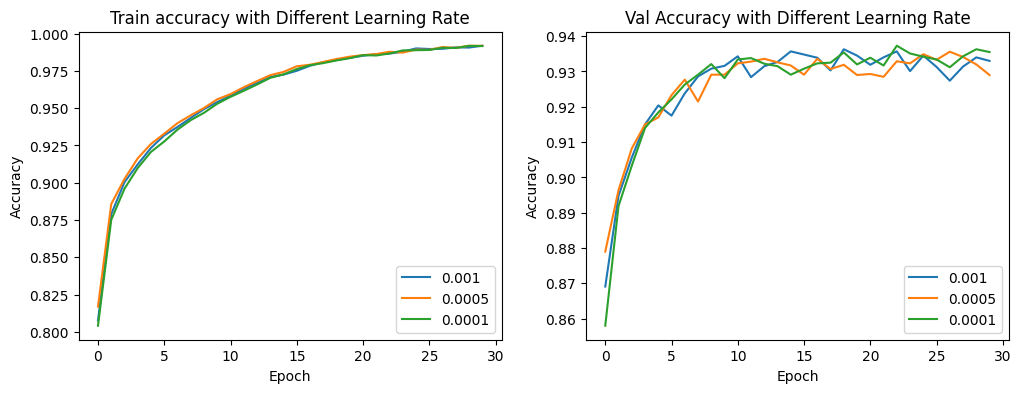

In [16]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
for optimizer, history in history_lr_dict.items():
    plt.plot(history.history['sparse_categorical_accuracy'], label=optimizer)
plt.title('Train accuracy with Different Learning Rate')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
for optimizer, history in history_lr_dict.items():
    plt.plot(history.history['val_sparse_categorical_accuracy'], label=optimizer)
plt.title('Val accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Val Accuracy with Different Learning Rate')
plt.show()

### Note: We can see learning rate don't have high effect on CNN model.

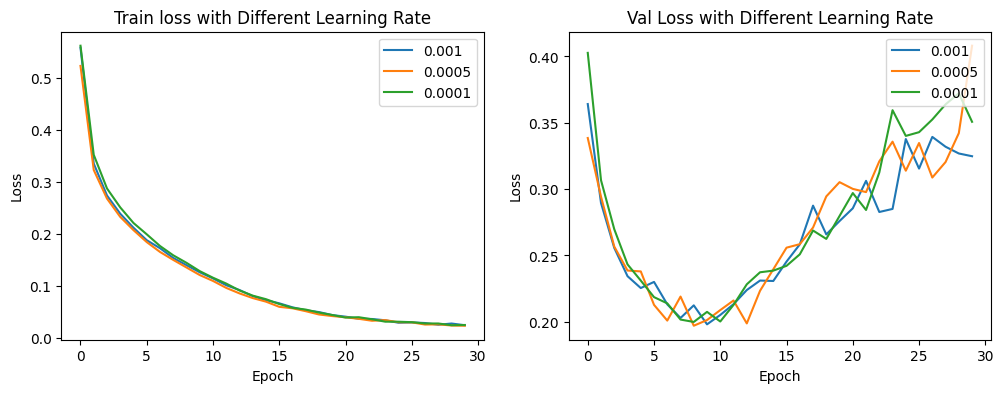

In [21]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
for lr, history in history_lr_dict.items():
    plt.plot(history.history['loss'], label=lr)
plt.title('Train loss with Different Learning Rate')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
for lr, history in history_lr_dict.items():
    plt.plot(history.history['val_loss'], label=lr)
plt.title('Val loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Val Loss with Different Learning Rate')
plt.show()

### Note: After 8 epoch, we model was overfit.

## Train model with Different Batch Size

In [22]:
batch_sizes=[32,64,128]

history_bs_dict = {}

for batch_size in batch_sizes:
    print(f'Training with learning rate: {batch_size}')

    model = build_model()

    history = model.fit(x=train_images, y=train_labels,
                        validation_data=(test_images, test_labels),
                        batch_size=batch_size, epochs=30, verbose=1)

    history_bs_dict[batch_size] = history

Training with learning rate: 32
Epoch 1/30
1875/1875 [==============================] - 22s 10ms/step - loss: 0.5394 - sparse_categorical_accuracy: 0.8093 - val_loss: 0.3594 - val_sparse_categorical_accuracy: 0.8715
Epoch 2/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3311 - sparse_categorical_accuracy: 0.8820 - val_loss: 0.3089 - val_sparse_categorical_accuracy: 0.8905
Epoch 3/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2732 - sparse_categorical_accuracy: 0.9020 - val_loss: 0.2687 - val_sparse_categorical_accuracy: 0.9035
Epoch 4/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2360 - sparse_categorical_accuracy: 0.9141 - val_loss: 0.2321 - val_sparse_categorical_accuracy: 0.9167
Epoch 5/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2108 - sparse_categorical_accuracy: 0.9230 - val_loss: 0.2243 - val_sparse_categorical_accuracy: 0.9193
Epoch 6/30
1875/1875 [==========================

In [ ]:
import pickle

with open('history_bs_dict.pkl', 'wb') as f:
    pickle.dump(history_bs_dict, f)
!cp /content/history_bs_dict.pkl /content/drive/MyDrive/history_bs_dict.pkl

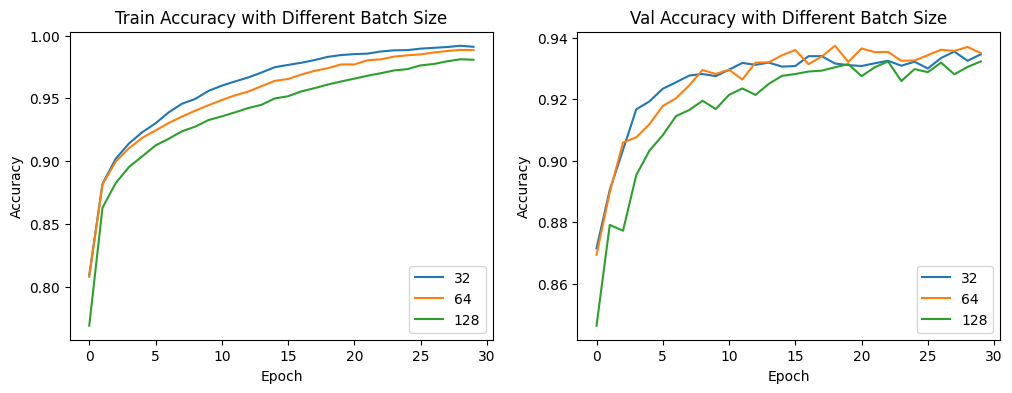

In [25]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
for batch_size, history in history_bs_dict.items():
    plt.plot(history.history['sparse_categorical_accuracy'], label=batch_size)
plt.title('Train Accuracy with Different Batch Size')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
for batch_size, history in history_bs_dict.items():
    plt.plot(history.history['val_sparse_categorical_accuracy'], label=batch_size)
plt.title('Val Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Val Accuracy with Different Batch Size')
plt.show()

### Note: We can see batch size don't have high effect on my CNN model.

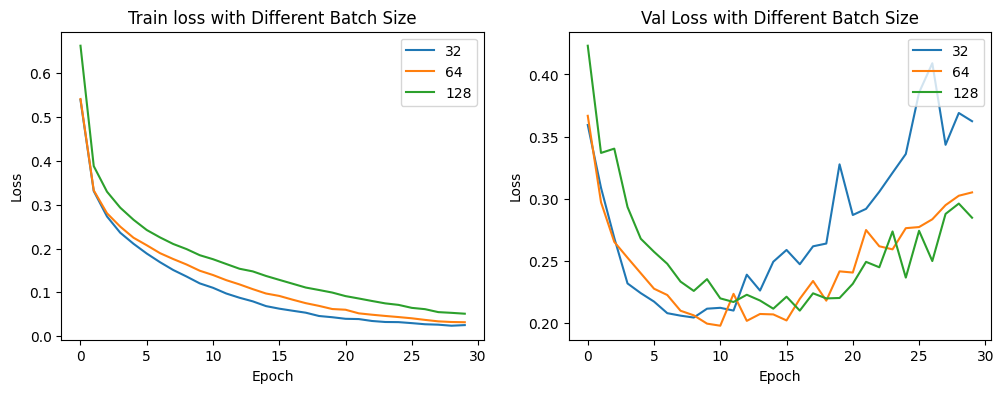

In [27]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
for batch_size, history in history_bs_dict.items():
    plt.plot(history.history['loss'], label=batch_size)
plt.title('Train loss with Different Batch Size')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
for batch_size, history in history_bs_dict.items():
    plt.plot(history.history['val_loss'], label=batch_size)
plt.title('Val loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Val Loss with Different Batch Size')
plt.show()

# SLICE MODEL. What inside the model?

In [ ]:
model.load_weights(filepath='/content/model_0.936.h5')

conv2d (None, 28, 28, 32)
conv2d_1 (None, 28, 28, 64)
conv2d_2 (None, 28, 28, 256)
average_pooling2d (None, 14, 14, 256)


conv2d_3 (None, 14, 14, 64)


conv2d_4 (None, 14, 14, 64)
conv2d_5 (None, 14, 14, 64)
average_pooling2d_1 (None, 7, 7, 64)
flatten (None, 3136)
dense (None, 128)
dropout (None, 128)
dense_1 (None, 32)
dense_2 (None, 10)


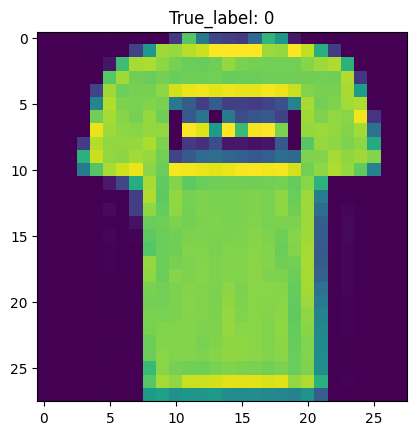

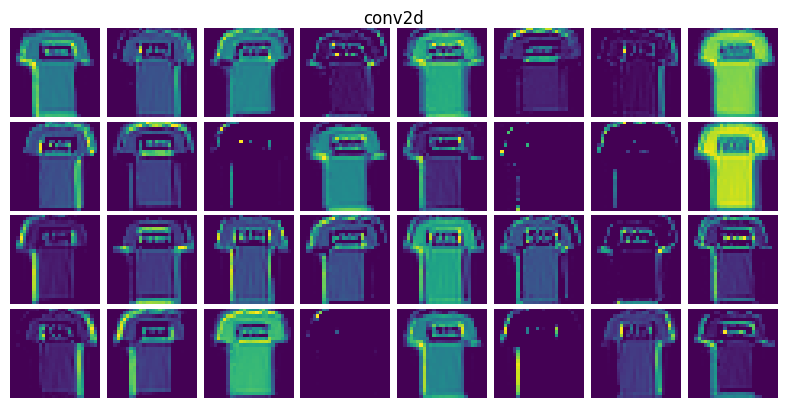

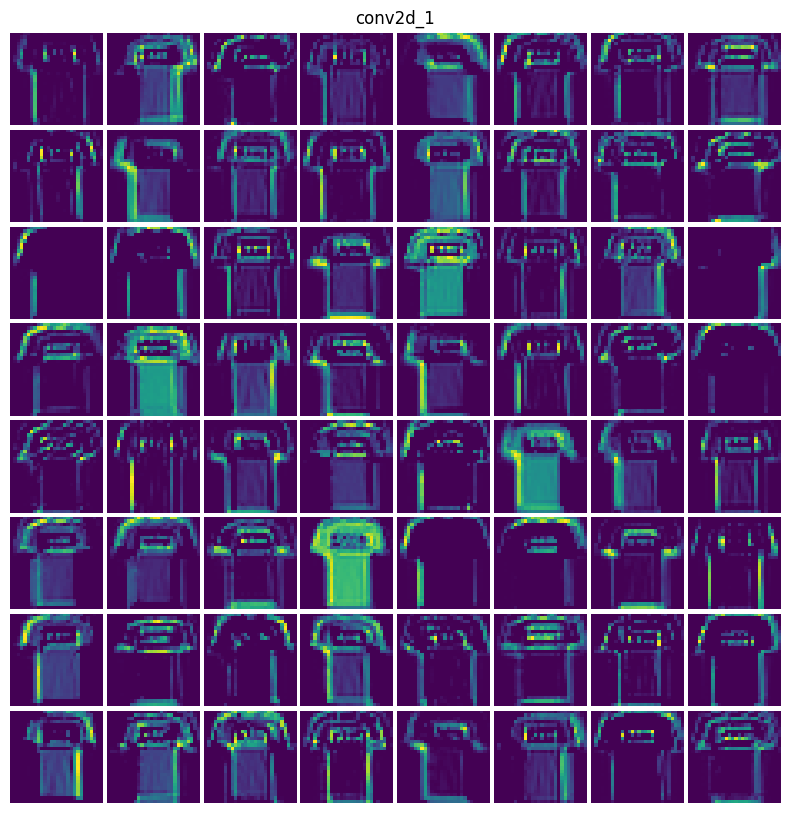

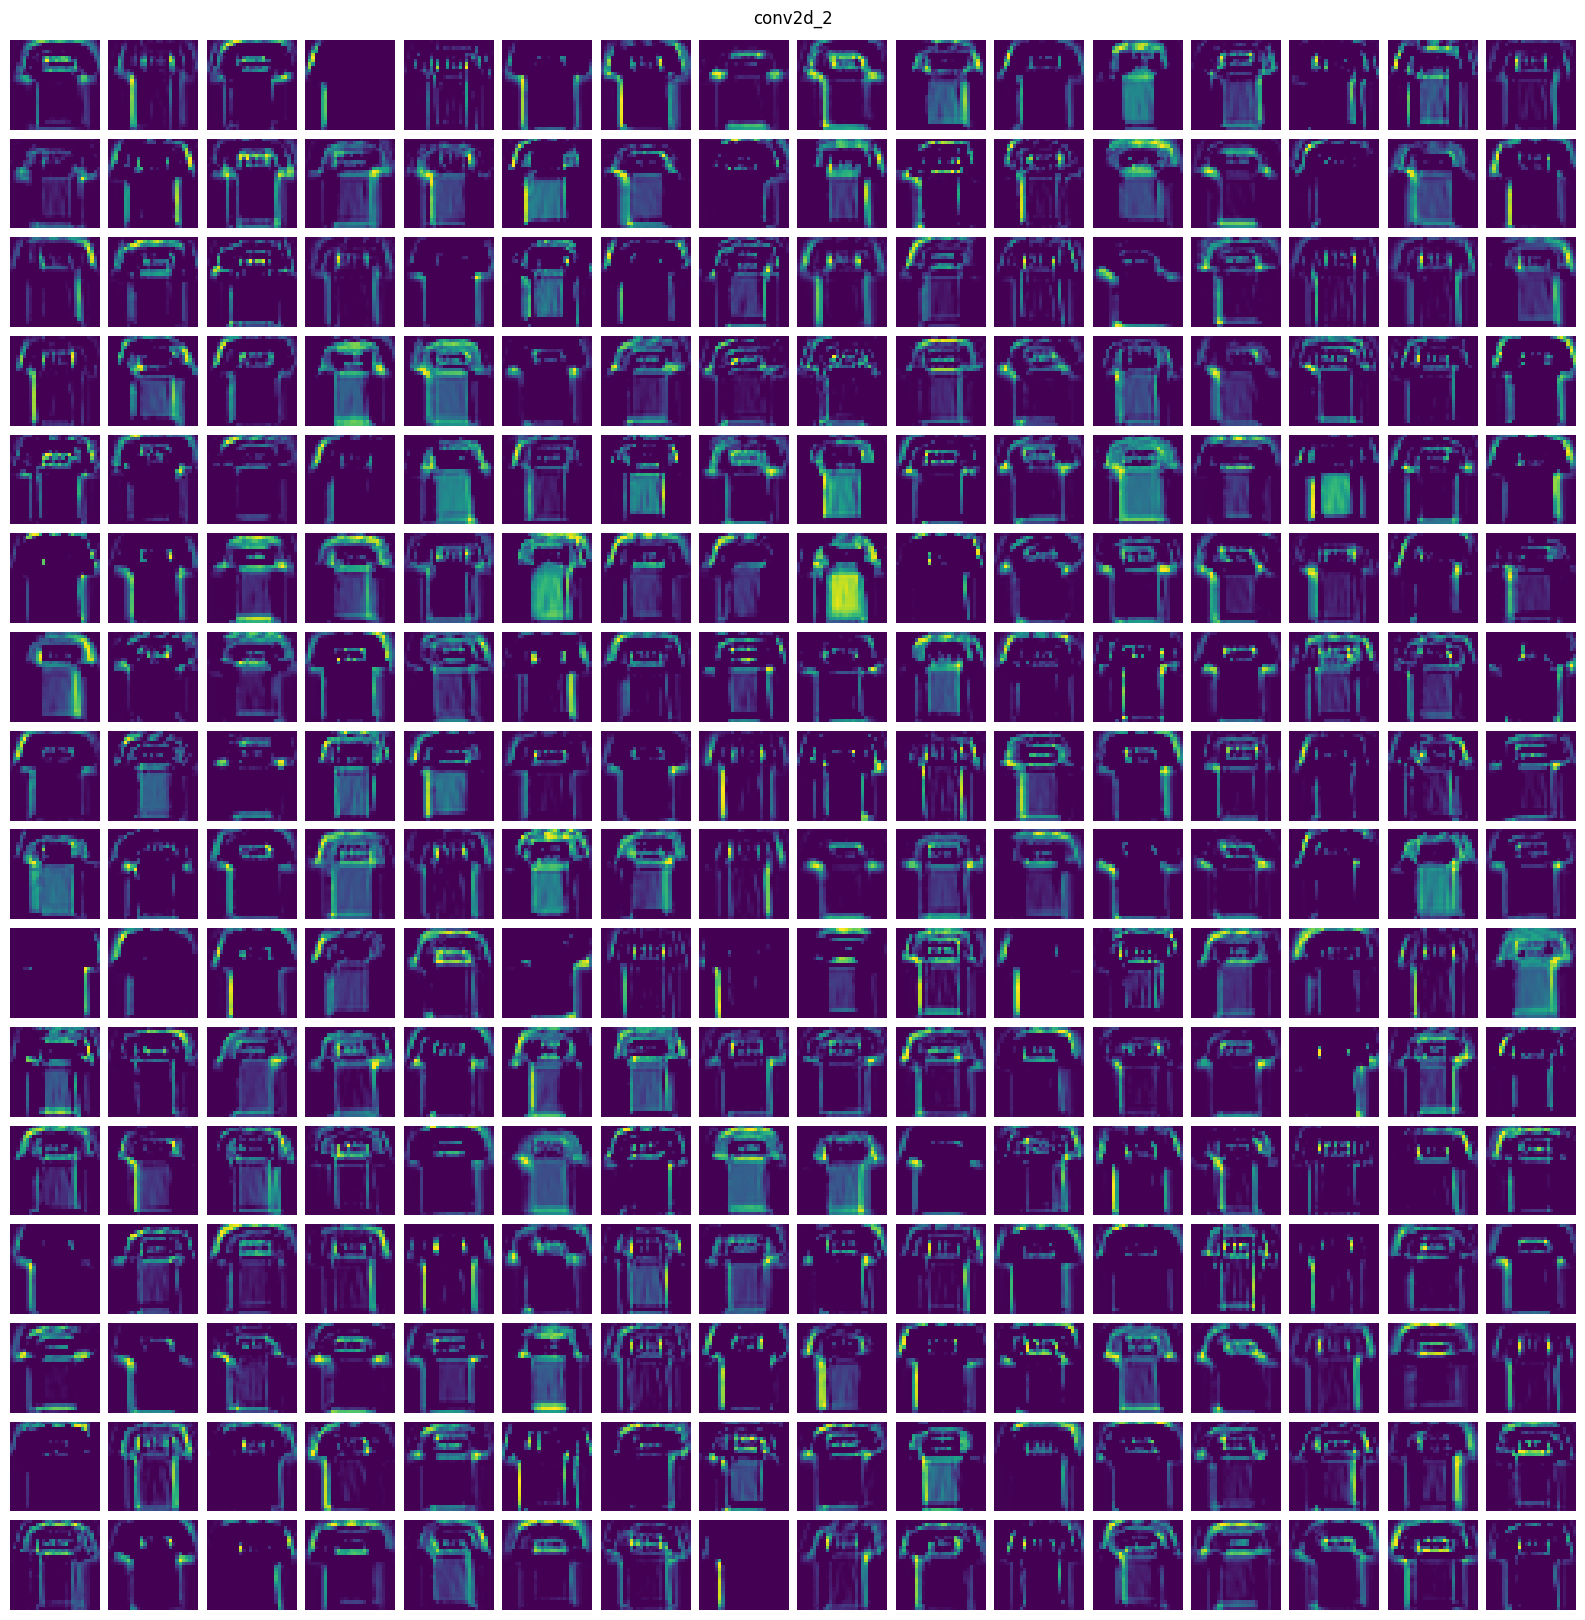

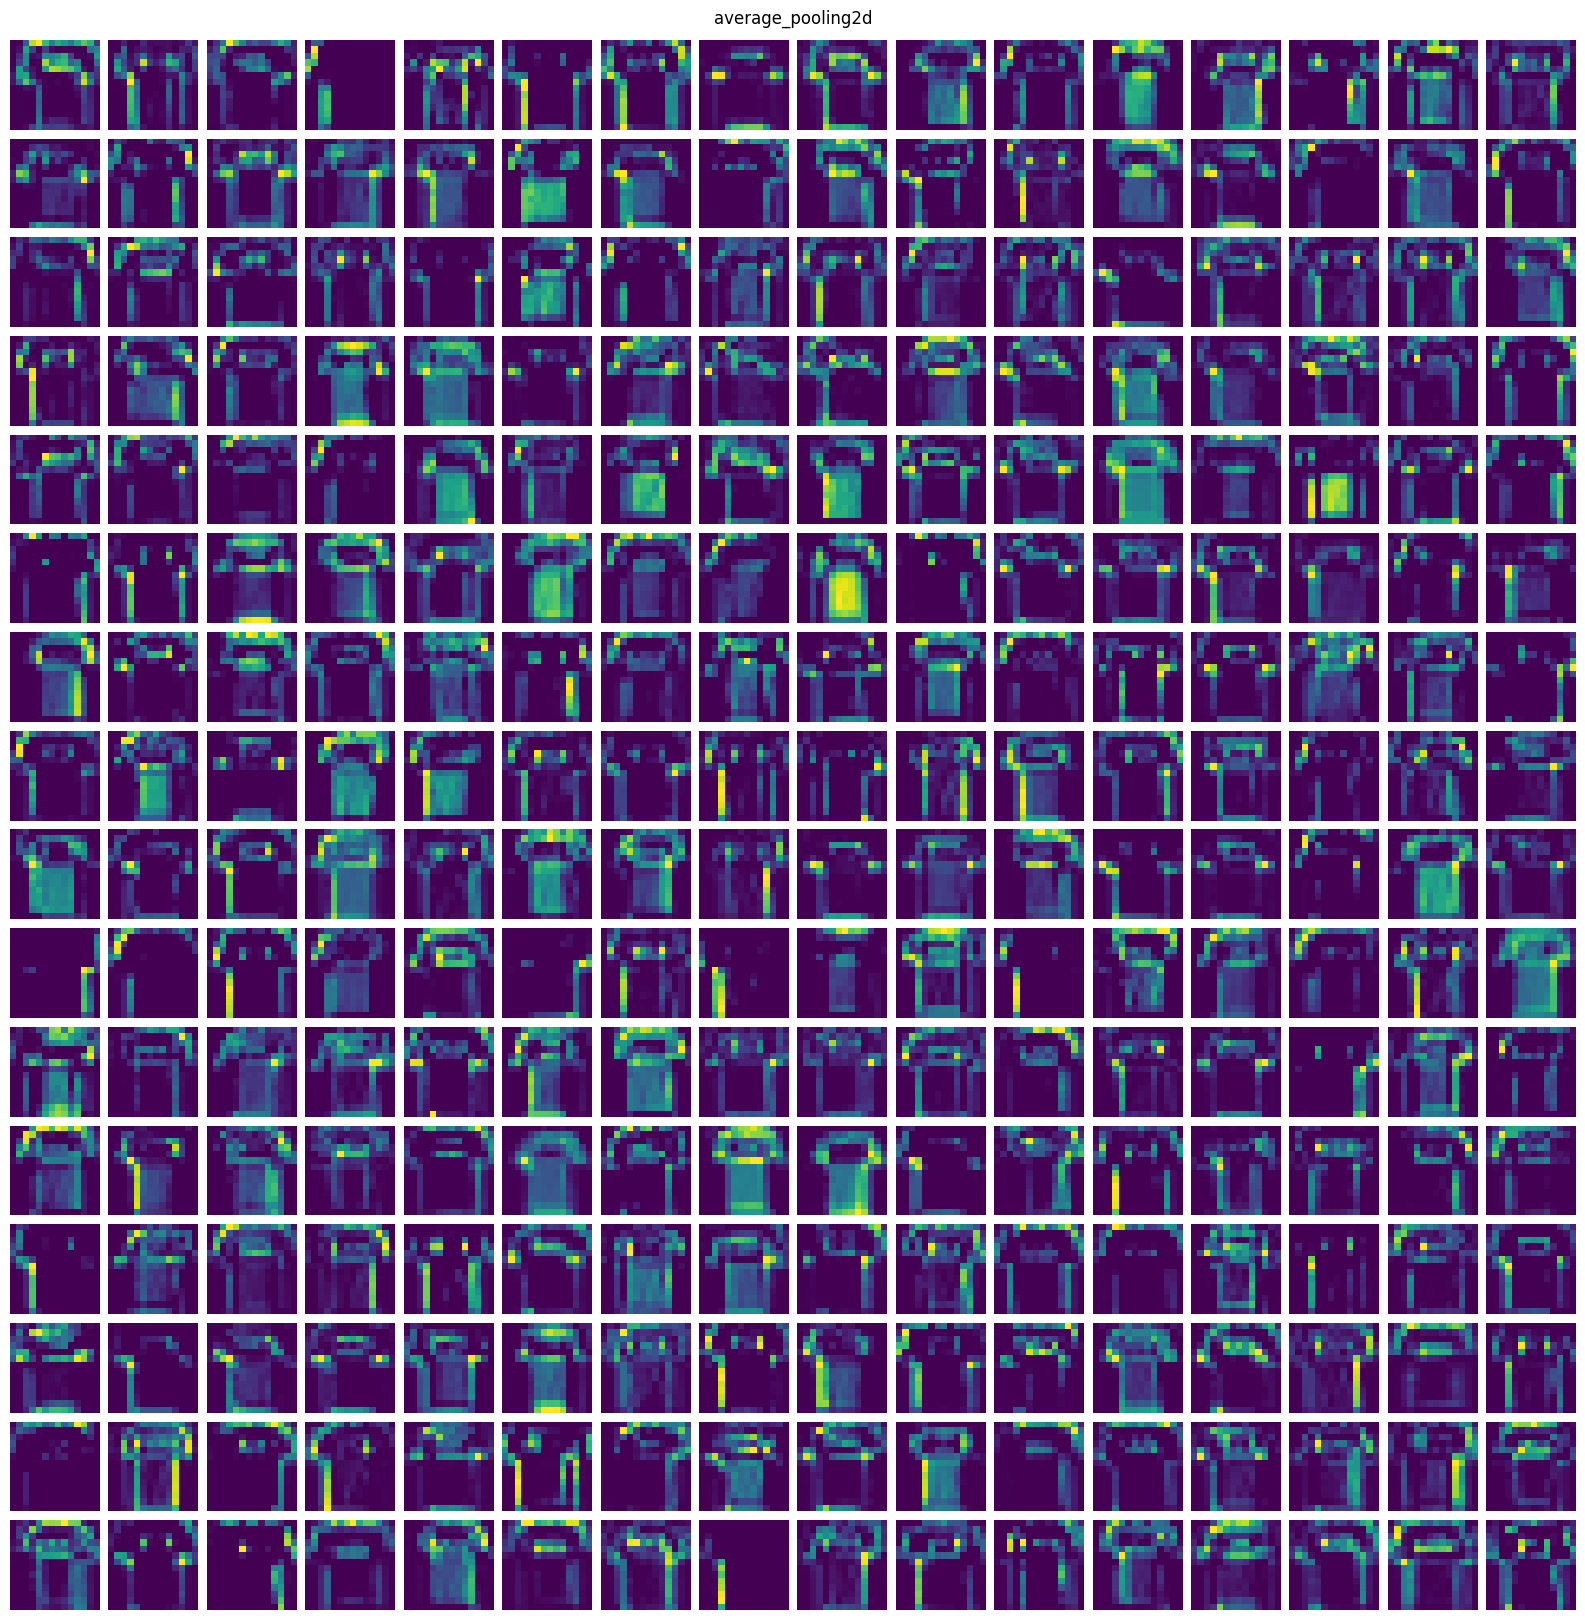

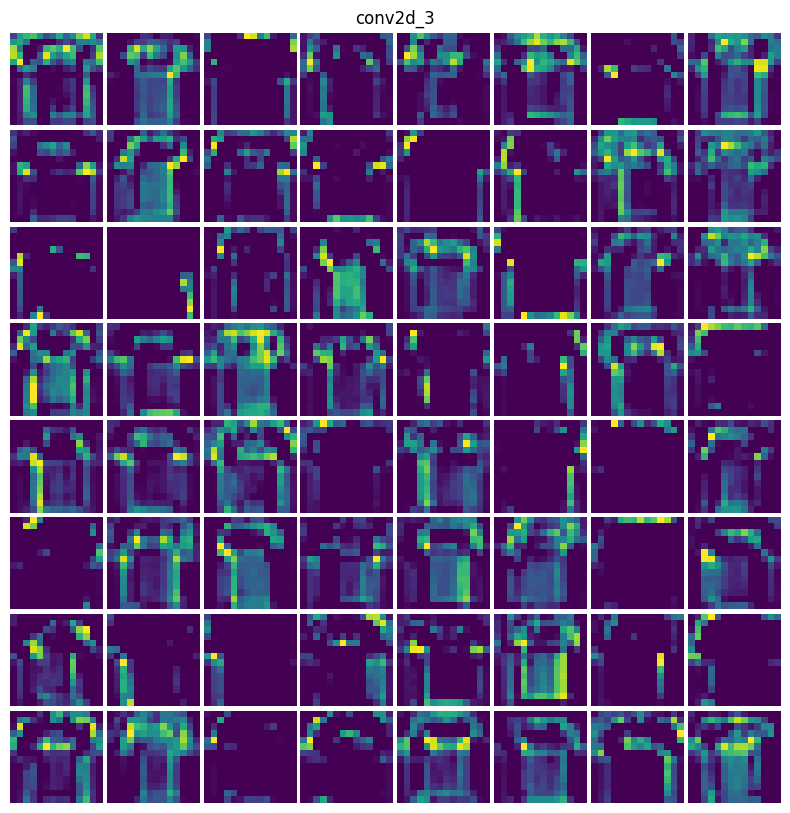

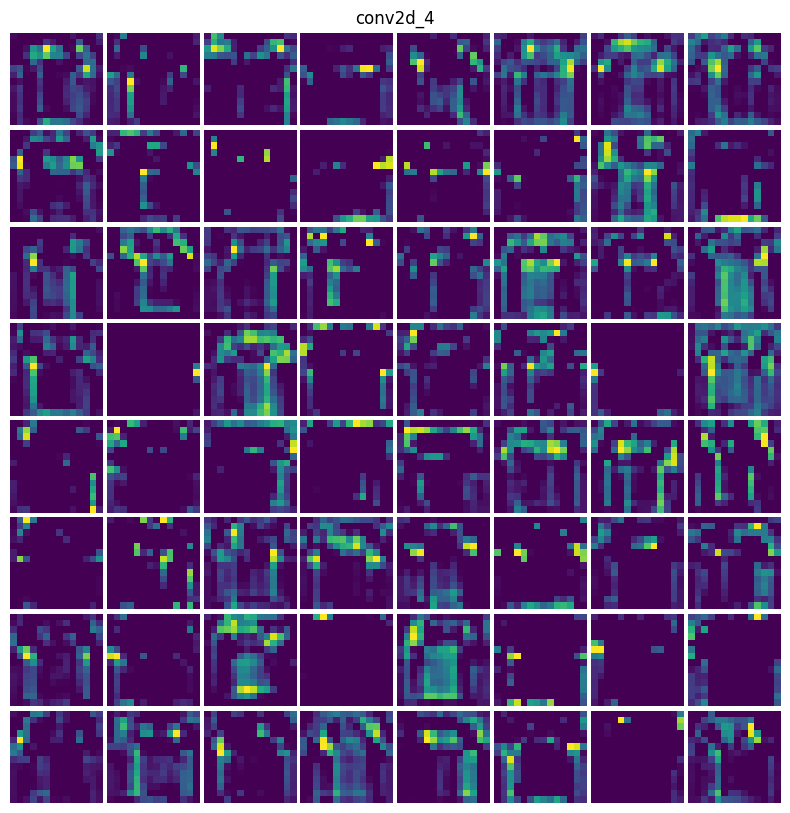

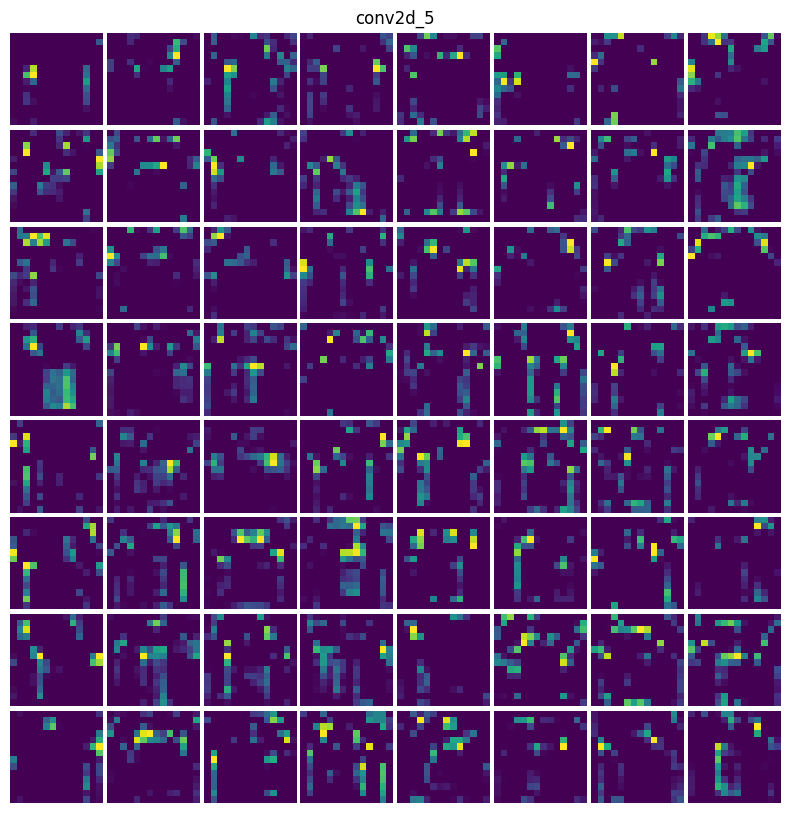

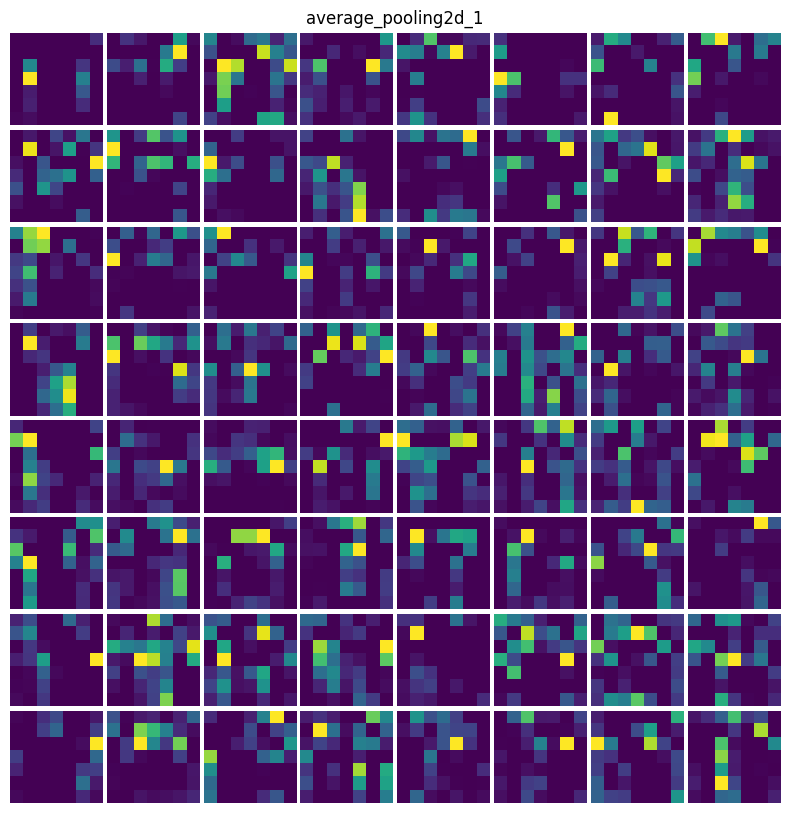

In [28]:
# visualize output of one layer
def visualize_conv_layer(model, layer_name, image, show_plot=True):
    layer_output=model.get_layer(layer_name).output
    intermediate_model = tf.keras.models.Model(inputs=model.input, outputs=layer_output)
    intermediate_prediction = intermediate_model.predict(image.reshape(1,28,28,1), verbose = 0)

    if layer_name.startswith('flatten') or layer_name.startswith('dense') or layer_name.startswith('dropout'):
       print(layer_name, layer_output.shape)
    elif len(layer_output.shape)<4:
        print(layer_name, layer_output.shape)
        print(intermediate_prediction)
    else:
        x = layer_output.shape[-1]
        row_size=4 if x<=32 else 8 if x<=64 else 16
        col_size=x//row_size

        img_index=0
        print(layer_name, layer_output.shape)

        fig,ax=plt.subplots(row_size,col_size,figsize=(col_size,row_size))
        for row in range(0,row_size):
            for col in range(0,col_size):
                ax[row][col].imshow(intermediate_prediction[0, :, :, img_index])
                ax[row][col].axis("off")
                img_index=img_index+1
        plt.tight_layout()
        plt.subplots_adjust(wspace=0.05, hspace=col_size/160)
        fig.suptitle(layer_name, y=1.01)

        if not show_plot:
            plt.close()

        return fig

# visualize_conv_layer(model, 'dense_1', train_images[0])

test=train_images[1]
plt.imshow(test)
plt.title(f'True_label: {train_labels[1]}')
process=[test]
for layer in [layer.name for layer in model.layers][1:]:
    x = visualize_conv_layer(model, layer, test, show_plot=True) # get ouput of each layer in model.
    process.append(x)

### Note: We model was receive a individual feature map for each class y going through the Con2D layer.

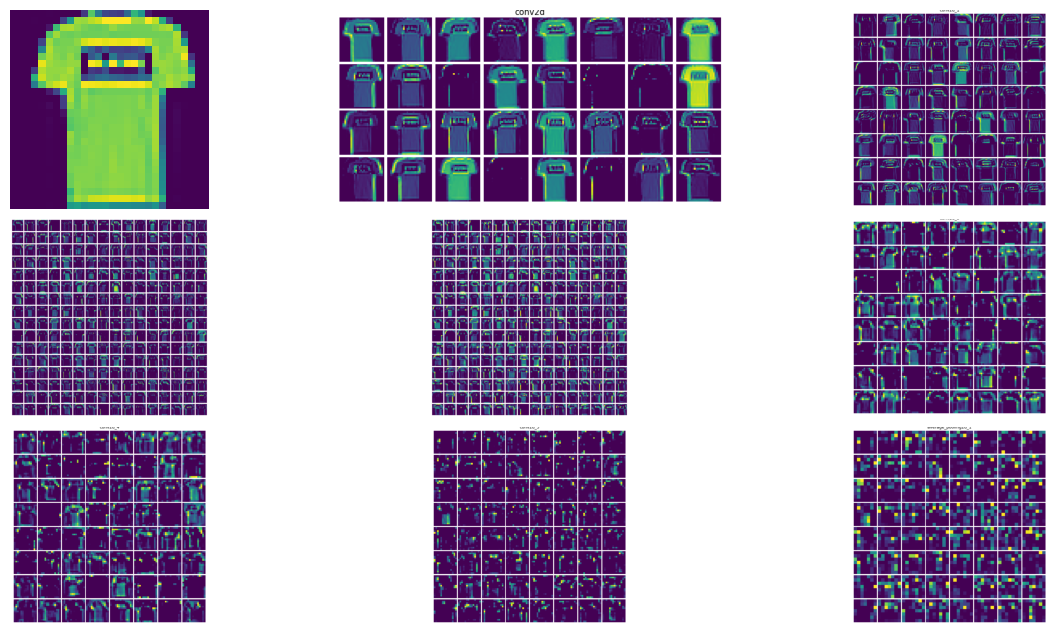

In [29]:
def show_figures(figures, rows=1):
    num_figures = len(figures)
    cols = (num_figures + rows - 1) // rows

    fig, axs = plt.subplots(rows, cols, figsize=(16, 8))

    try:
        axs[0,0].imshow(figures[0])
        axs[0,0].axis("off")
    except:
        axs[0].imshow(figures[0])
        axs[0].axis("off")

    try:
        for i, ax in enumerate(axs.flat[1:]):
            ax.axis("off")
            figure = figures[i + 1]
            figure.canvas.draw()
            rgba_buf = figure.canvas.buffer_rgba()
            (w, h) = figure.canvas.get_width_height()
            rgba_arr = np.frombuffer(rgba_buf, dtype=np.uint8).reshape((h, w, 4))
            ax.imshow(rgba_arr)
    except:
        pass
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.show()

show_figures(process[:-5], rows=3)


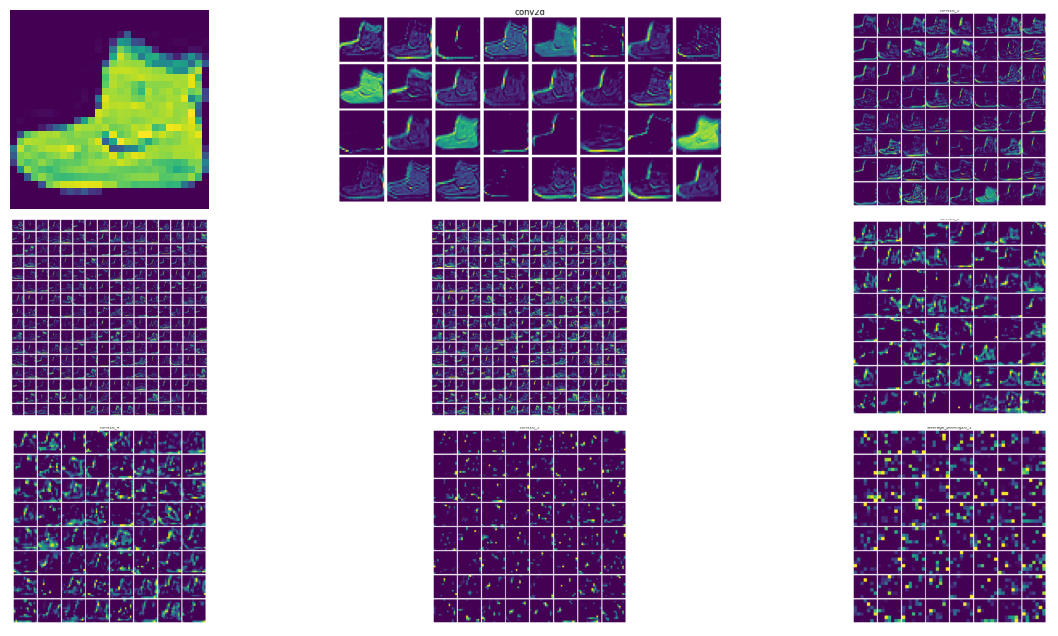

In [ ]:
# Show some another image
show_figures(process[:-5], rows=3)


# ASSESS TRAINED MODEL PERFORMANCE

313/313 [==============================] - 1s 4ms/step


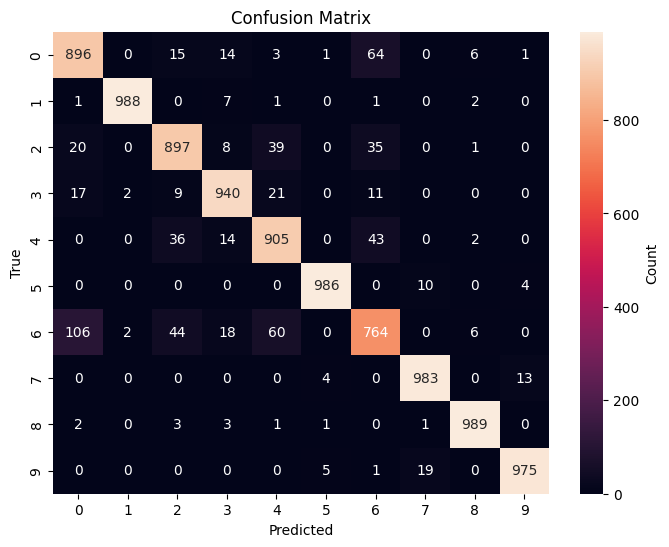

In [31]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=range(10),
            yticklabels=range(10), cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### We can see have more wrong predict between class 0, 2, 4 with class 6, and between class 2, 4. To explain for it, we go to plot distribution of pixel in each class.

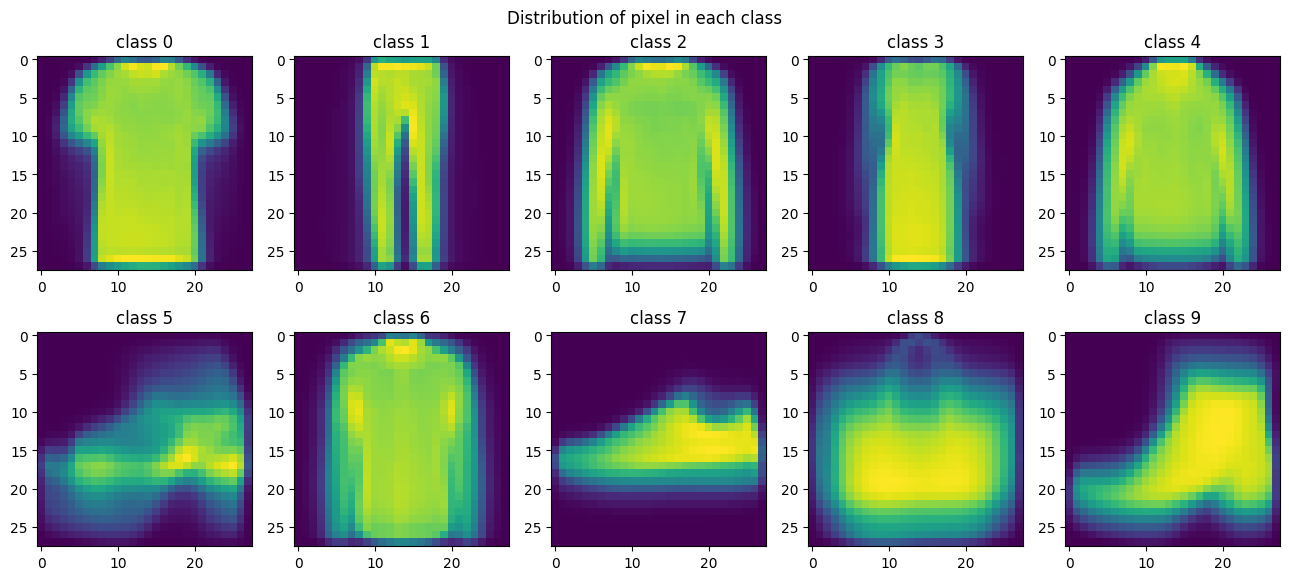

In [48]:
# distribution of pixel in each class
class_pixel_sums = []

for class_label in np.unique(train_labels):
    class_images = train_images[train_labels == class_label]
    class_pixel_sum = np.sum(class_images, axis=0)
    class_pixel_sums.append(class_pixel_sum)

num_classes = len(class_pixel_sums)

plt.figure(figsize=(13, 6))

for i, class_pixel_sum in enumerate(class_pixel_sums):
    plt.subplot(2, 5, i+1)
    plt.imshow(class_pixel_sum/6000)
    plt.title(f'class {i}')
plt.subplots_adjust(wspace=0.01, hspace=0.05)
plt.suptitle('Distribution of pixel in each class', y = 0.96)
plt.tight_layout()
plt.show()

### Note:
Ok, it's clear. We see distribution of pixel in class 2 and 4 is very same, and it quite similar with class 6.

About mistake between class 0 and 6, can explain by class 6 have all feature of class 0. We see that the long sleeves of class 6 have a slightly blurred distribution, proving that class 6 has a part of short sleeves, which is completely consistent with the features of class 0.